In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Trap(h):
    """Runs the trapezoidal rule for the equation u' = v and v' = u, with BVs u(0) = 1 and u(1) = 1."""
    J = int(1/h)

    # define B internal block matrix
    B = np.zeros([2,4])
    B[0,0] = -1
    B[0,1] = -h/2
    B[1,0] = -h/2
    B[1,1] = -1

    B[0,2] = 1
    B[0,3] = -h/2
    B[1,2] = -h/2
    B[1,3] = 1
    
    M = np.zeros([2*J,2*J])

    counter_1 = 0
    counter_2 = 0
    for i in range(2*J-2):
        if i%2 == 0:
            M[i, counter_1: counter_1 + 4] = B[0,:]
            counter_1 += 2
        if i%2 == 1:
            M[i, counter_2: counter_2 + 4] = B[1,:]
            counter_2 += 2
    M[-2,0] = h/2
    M[-2,1] = -1
    M[-2, -2] = 1

    M[-1,-4] =  -h/2
    M[-1, -3] = -1
    M[-1,-1] = 1
    
    RHS = np.zeros([2*J ])
    RHS[-1] = h/2
    RHS[-2] = - h/2
    
    soln = np.linalg.solve(M,RHS)
    U_soln = np.empty([J+1])
    V_soln = np.empty([J+1])

    counter_1 = 1
    U_soln[0] = 1
    U_soln[-1] = 1
    for i in range(2*J-2):
        if i % 2 == 0:
            U_soln[counter_1] = soln[i]
            counter_1 += 1
    counter_2 = 1
    for i in range(1,2*J-2):
        if i % 2 == 1:
            V_soln[counter_2] = soln[i]
            counter_2 +=1
    V_soln[0]= soln[-2]
    V_soln[-1] = soln[-1] 
    return U_soln, V_soln 

In [3]:
h = 0.2
J = int(1/h)

# define B internal block matrix
B = np.zeros([2,4])
B[0,0] = -1
B[0,1] = -h/2
B[1,0] = -h/2
B[1,1] = -1

B[0,2] = 1
B[0,3] = -h/2
B[1,2] = -h/2
B[1,3] = 1

print(B)

[[-1.  -0.1  1.  -0.1]
 [-0.1 -1.  -0.1  1. ]]


In [4]:
M = np.zeros([2*J,2*J])

counter_1 = 0
counter_2 = 0
for i in range(2*J-2):
    if i%2 == 0:
        M[i, counter_1: counter_1 + 4] = B[0,:]
        counter_1 += 2
    if i%2 == 1:
        M[i, counter_2: counter_2 + 4] = B[1,:]
        counter_2 += 2
M[-2,0] = h/2
M[-2,1] = -1
M[-2, -2] = 1

M[-1,-4] =  -h/2
M[-1, -3] = -1
M[-1,-1] = 1
print(M)

[[-1.  -0.1  1.  -0.1  0.   0.   0.   0.   0.   0. ]
 [-0.1 -1.  -0.1  1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.  -0.1  1.  -0.1  0.   0.   0.   0. ]
 [ 0.   0.  -0.1 -1.  -0.1  1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.  -0.1  1.  -0.1  0.   0. ]
 [ 0.   0.   0.   0.  -0.1 -1.  -0.1  1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.  -0.1  1.  -0.1]
 [ 0.   0.   0.   0.   0.   0.  -0.1 -1.  -0.1  1. ]
 [ 0.1 -1.   0.   0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.1 -1.   0.   1. ]]


In [5]:
RHS = np.zeros([2*J ])
RHS[-1] = h/2
RHS[-2] = - h/2
print(RHS)

[ 0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.1]


In [6]:
soln = np.linalg.solve(M,RHS)
U_soln = np.empty([J+1])
V_soln = np.empty([J+1])
print(soln)
counter_1 = 1
U_soln[0] = 1
U_soln[-1] = 1
for i in range(2*J-2):
    if i % 2 == 0:
        U_soln[counter_1] = soln[i]
        counter_1 += 1
counter_2 = 1
for i in range(1,2*J-2):
    if i % 2 == 1:
        V_soln[counter_2] = soln[i]
        counter_2 +=1
V_soln[0]= soln[-2]
V_soln[-1] = soln[-1] 
print(U_soln)
print(V_soln)

[0.01338919 1.10133892 0.23615239 1.12629308 0.4684571  1.19675403
 0.71968937 1.31556867 1.         1.48753761]
[1.         0.01338919 0.23615239 0.4684571  0.71968937 1.        ]
[1.         1.10133892 1.12629308 1.19675403 1.31556867 1.48753761]


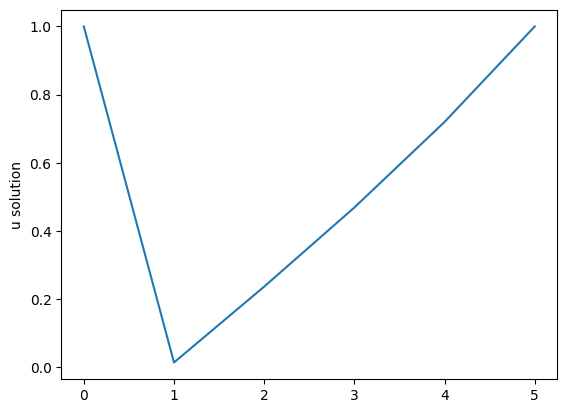

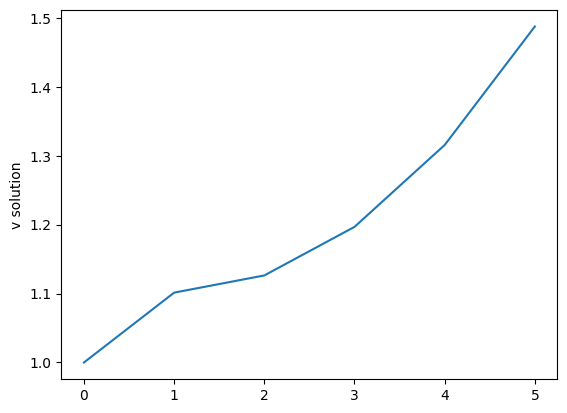

In [7]:
plt.plot(U_soln)
plt.ylabel('u solution')
plt.show()

plt.plot(V_soln)
plt.ylabel('v solution')
plt.show()


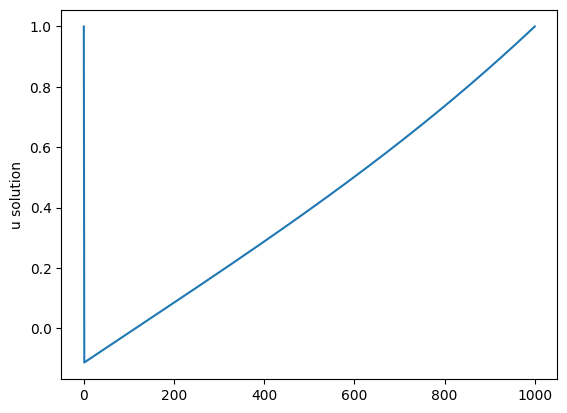

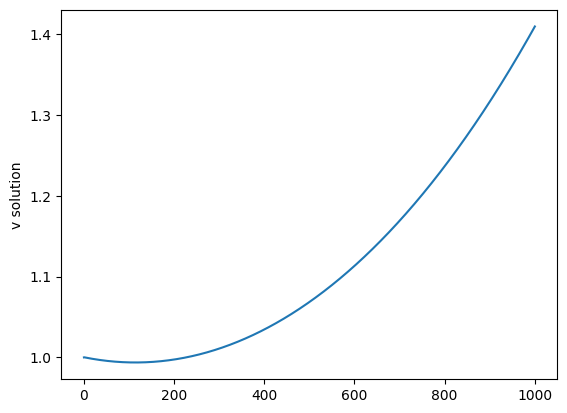

In [8]:
h = 0.001
U_soln_1 , V_soln_1 = Trap(h)
U_soln_2, V_soln_2 = Trap(h/2)
J = int(1/h)
U_soln_rich = np.zeros([J+1])
V_soln_rich = np.zeros([J+1])
for i in range(J+1):
    U_soln_rich[i] = (4*U_soln_2[2*i] - U_soln_1[i])/3
    V_soln_rich[i] = (4*V_soln_2[2*i] - V_soln_1[i])/3

plt.plot(U_soln_rich)
plt.ylabel('u solution')
plt.show()

plt.plot(V_soln_rich)
plt.ylabel('v solution')
plt.show()
